### Kernel PCA using polynomial map

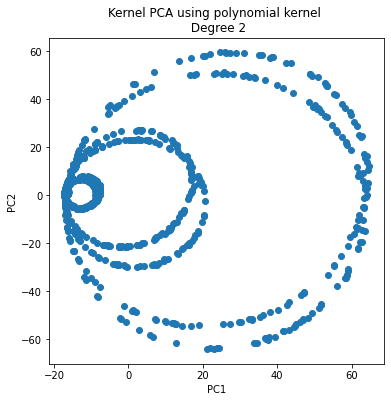

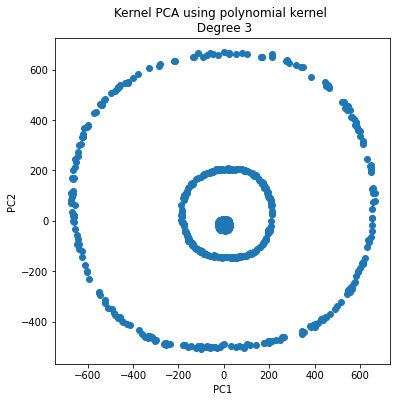

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import eigh

df = pd.read_csv("/content/Dataset.csv", names=['x', 'y']);

input_data_set = df.iloc[:, :].values

# Construct the kernel
def get_poly_kernel(X, degree=2):
    
  # Compute the kernel matrix.
  K = np.matmul(X, X.T) #Data points of X is in row wise, so X is already in transposed form
  K += 1
  K **= degree

  # Center the kernel matrix.
  N = K.shape[0]
  ones_mat = np.ones((N, N))
  col_wise_sum = np.matmul(ones_mat, K) / N #ij entry = 1/N * sum of jth column
  row_wise_sum = np.matmul(K, ones_mat) / N #ij entry = 1/N * sum of ith row

  row_wise_sum_of_col_wise_sum = np.matmul(col_wise_sum, ones_mat) / N
  K_centered = K - col_wise_sum - row_wise_sum + row_wise_sum_of_col_wise_sum

  return K_centered

# Kernel PCA    
def poly_kernel_pca(K, components=2):
    
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1] #sort in descending order

  PCs = np.column_stack([(eigvecs[:, i]/np.sqrt(eigvals[i])) for i in range(components)]) # Top k normalized eigenvectors

  project_vals = K.dot(PCs)
  return project_vals 
    
for i in range(2):
  degree = i + 2    
  KC = get_poly_kernel(input_data_set, degree)
  pc_vals = poly_kernel_pca(KC)

  plt.figure(figsize=(6,6))

  plt.title("Kernel PCA using polynomial kernel \n Degree " + str(degree))
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  plt.scatter(pc_vals[:, 0], pc_vals[:, 1])

  #plt.grid()
  plt.show()